# Intro

Dataset URL: <a href="https://archive.ics.uci.edu/ml/datasets/HTRU2"> here </a><br>
Tasks:<br>
1. K-Means
2. Hierarchical Clustering

Metrics:<br>
1. K-Means: find the value of K and the optimal value of it
2. Hierarchical Clustering: find the optimal clustering level
3. Contingency Matrix

# Setup

In [60]:
import sys
print(sys.executable)

/home/hui/anaconda3/envs/dl/bin/python3.8


In [61]:
! pip install numpy pandas seaborn matplotlib

# Preprocessing

In [62]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

## Load the dataset

In [63]:
head = ["integrated_mean", "integrated_std", "integrated_excessK", "integrated_skew", "dm_snr_mean", "dm_snr_std", "dm_snr_exce", "dm_snr_skew", "class"]
dataset = pd.read_csv("./dataset/HTRU_2.csv", encoding="utf-8", names=head)

## Utility Func

In [64]:
# check for miss data
def check_missing_data(df):
    '''
    check missing data from the given dataset
    
    INPUT:
        df: dataframe
    
    OUTPUT:
        return the result of missing data in percentage
    '''
    missing_values_count = df.isnull().sum()
    
    tot_cells = np.product(df.shape)
    
    tot_missing = missing_values_count.sum()

    # percent of data that is missing
    return ((tot_missing/tot_cells) * 100)

In [110]:
def plot_dist(y, title, hue_in=None):
    '''
    Distribution plot func

    INPUT:
      y: list/ serie
      title: str
    
    OUTPUT:
      distribution plot of the given list/serie
    '''

    # sns.displot(y, kde=True, height=8, aspect=15/5)
    sns.displot(y, hue=hue_in, kde=True, aspect=15/5)
    plt.title(title, size=15, weight='bold')
    plt.show()

In [122]:
def plot_dist_class(x_in, title, hue_in=None):
    sns.histplot(x=x_in, hue=hue_in, palette="cool", kde=True)
    plt.title(title, size=15, weight='bold')
    plt.show()

## Hacking

In [66]:
pec = [.05, .25, .5, .75, .95]
dataset.describe(percentiles=pec)

integrated_mean  integrated_std  integrated_excessK  integrated_skew  \
count     17898.000000    17898.000000        17898.000000     17898.000000   
mean        111.079968       46.549532            0.477857         1.770279   
std          25.652935        6.843189            1.064040         6.167913   
min           5.812500       24.772042           -1.876011        -1.791886   
5%           57.491797       34.714316           -0.231671        -0.556371   
25%         100.929688       42.376018            0.027098        -0.188572   
50%         115.078125       46.947479            0.223240         0.198710   
75%         127.085938       51.023202            0.473325         0.927783   
95%         143.072656       56.473756            2.706561        10.138507   
max         192.617188       98.778911            8.069522        68.101622   

        dm_snr_mean    dm_snr_std   dm_snr_exce   dm_snr_skew         class  
count  17898.000000  17898.000000  17898.000000  17898.000000  17898.000000  
mean      12.614400     26.326515      8.303556    104.857709      0.091574  
std       29.472897     19.470572      4.506092    106.514540      0.288432  
min        0.213211      7.370432     -3.139270     -1.976976      0.000000  
5%         1.005853     11.082345      0.530908     -0.499720      0.000000  
25%        1.923077     14.437332      5.781506     34.960504      0.000000  
50%        2.801839     18.461316      8.433515     83.064556      0.000000  
75%        5.464256     28.428104     10.702959    139.309330      0.000000  
95%       82.966973     74.621642     15.770680    296.379055      1.000000  
max      223.392141    110.642211     34.539844   1191.000837      1.000000

In [67]:
dataset.columns

Index(['integrated_mean', 'integrated_std', 'integrated_excessK',
       'integrated_skew', 'dm_snr_mean', 'dm_snr_std', 'dm_snr_exce',
       'dm_snr_skew', 'class'],
      dtype='object')

In [68]:
dataset.shape

(17898, 9)

In [69]:
print("Missing dataset: {} %".format(check_missing_data(dataset)))

Missing dataset: 0.0 %


In [70]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   integrated_mean     17898 non-null  float64
 1   integrated_std      17898 non-null  float64
 2   integrated_excessK  17898 non-null  float64
 3   integrated_skew     17898 non-null  float64
 4   dm_snr_mean         17898 non-null  float64
 5   dm_snr_std          17898 non-null  float64
 6   dm_snr_exce         17898 non-null  float64
 7   dm_snr_skew         17898 non-null  float64
 8   class               17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [71]:
def val_counter(l):
    for feature in l:
        print(dataset['integrated_mean'].value_counts(normalize=True, dropna=False).sort_index(ascending=False))

In [72]:
val_counter(head)

192.617188    0.000056
190.421875    0.000056
189.734375    0.000056
186.023438    0.000056
185.257812    0.000056
                ...   
6.414062      0.000056
6.265625      0.000056
6.187500      0.000112
6.179688      0.000056
5.812500      0.000056
Name: integrated_mean, Length: 8626, dtype: float64
192.617188    0.000056
190.421875    0.000056
189.734375    0.000056
186.023438    0.000056
185.257812    0.000056
                ...   
6.414062      0.000056
6.265625      0.000056
6.187500      0.000112
6.179688      0.000056
5.812500      0.000056
Name: integrated_mean, Length: 8626, dtype: float64
192.617188    0.000056
190.421875    0.000056
189.734375    0.000056
186.023438    0.000056
185.257812    0.000056
                ...   
6.414062      0.000056
6.265625      0.000056
6.187500      0.000112
6.179688      0.000056
5.812500      0.000056
Name: integrated_mean, Length: 8626, dtype: float64
192.617188    0.000056
190.421875    0.000056
189.734375    0.000056
186.023438    0.

## Distributions

### Integrated Profile

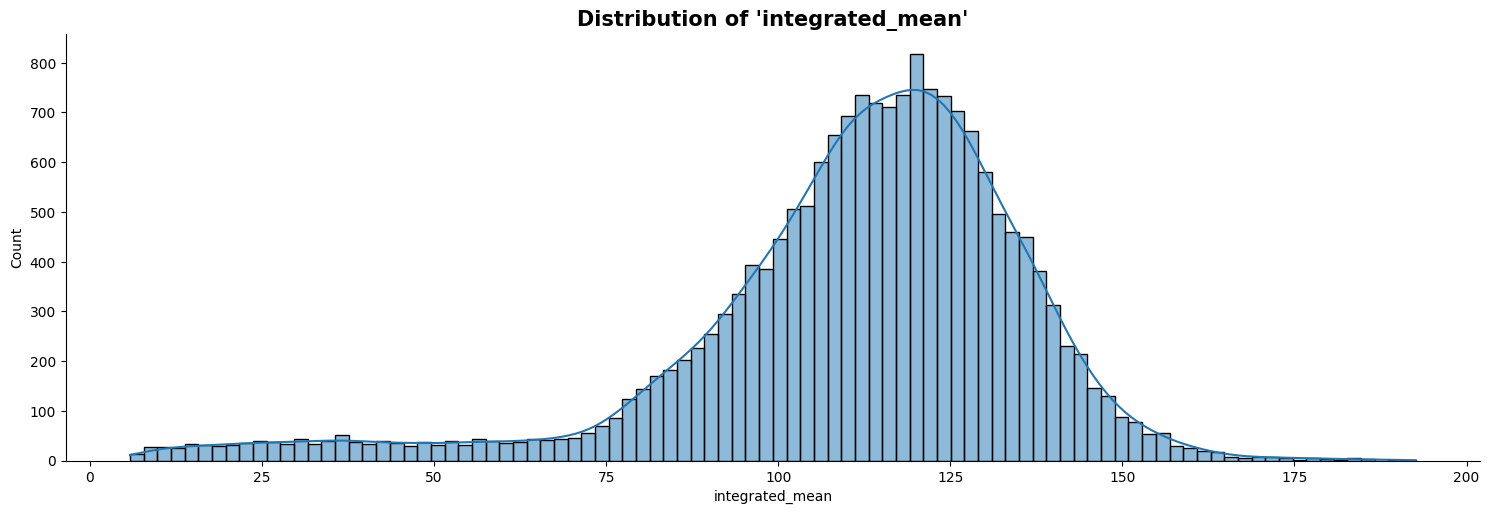

In [125]:
feature_ = "integrated_mean"
title = "Distribution of '{}'".format(feature_)
plot_dist(dataset[feature_], title)

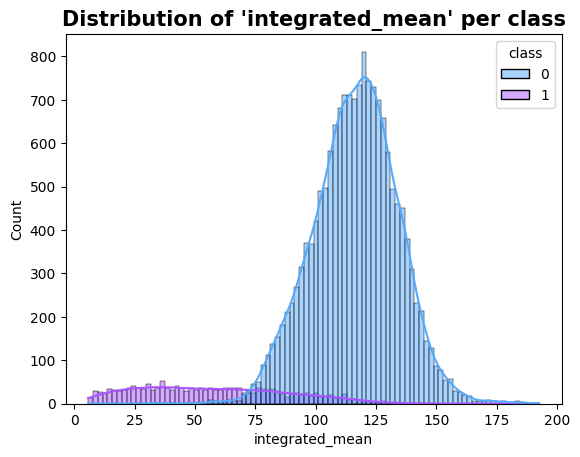

In [126]:
title = "Distribution of '{}' per class".format(feature_)
plot_dist_class(dataset[feature_], title, hue_in=dataset["class"])

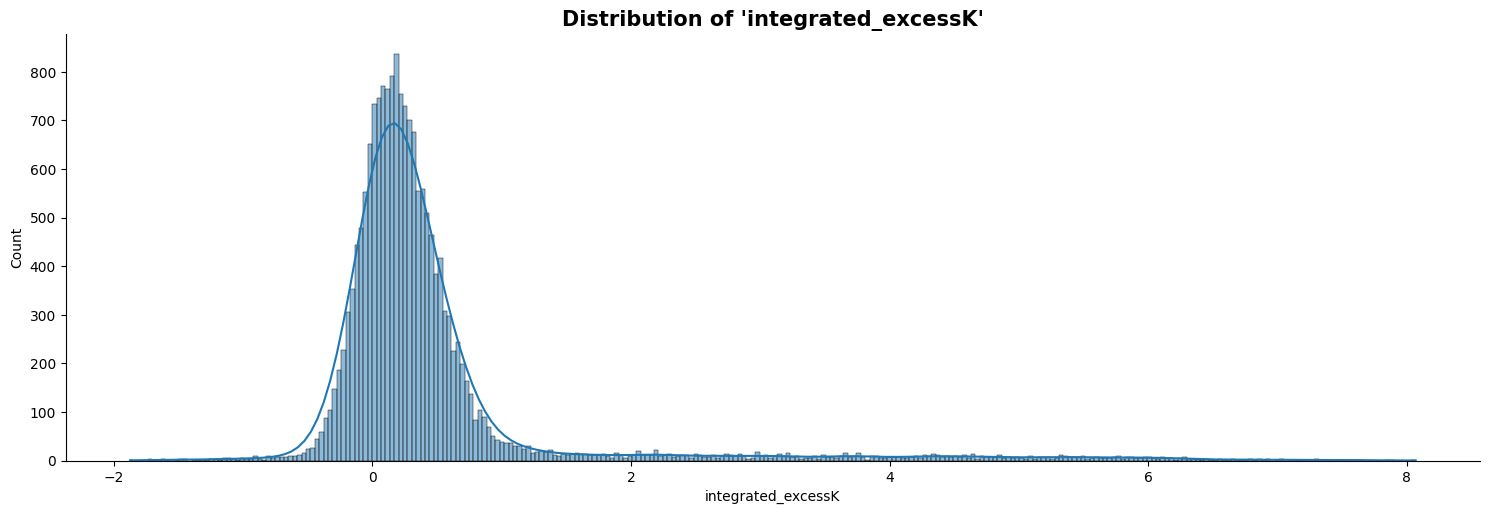

In [127]:
feature_ = "integrated_excessK"
title = "Distribution of '{}'".format(feature_)
plot_dist(dataset[feature_], title)

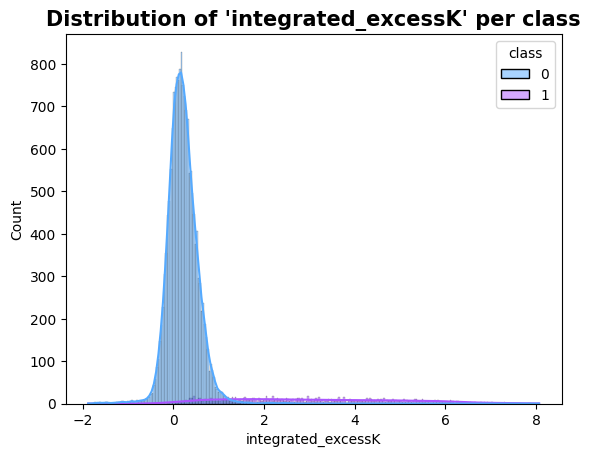

In [128]:
title = "Distribution of '{}' per class".format(feature_)
plot_dist_class(dataset[feature_], title, hue_in=dataset["class"])

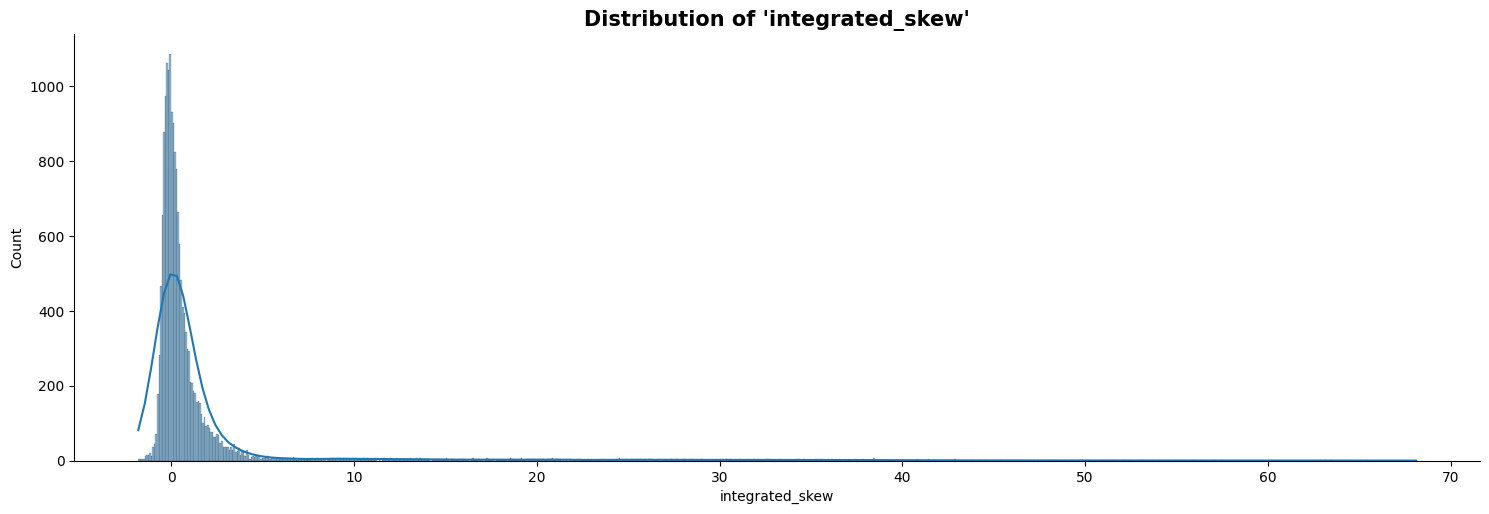

In [129]:
feature_ = "integrated_skew"
title = "Distribution of '{}'".format(feature_)
plot_dist(dataset[feature_], title)

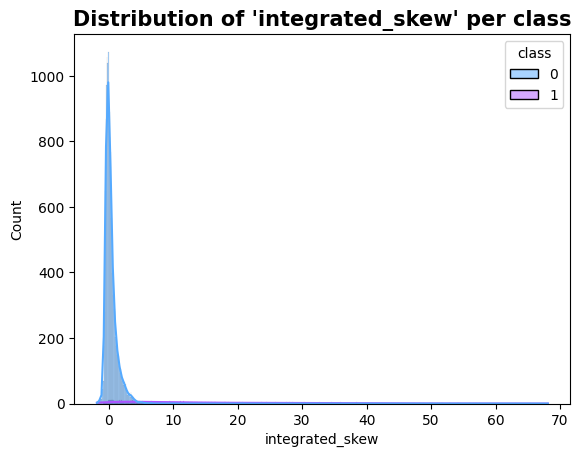

In [130]:
title = "Distribution of '{}' per class".format(feature_)
plot_dist_class(dataset[feature_], title, hue_in=dataset["class"])

### DM-SNR Curve

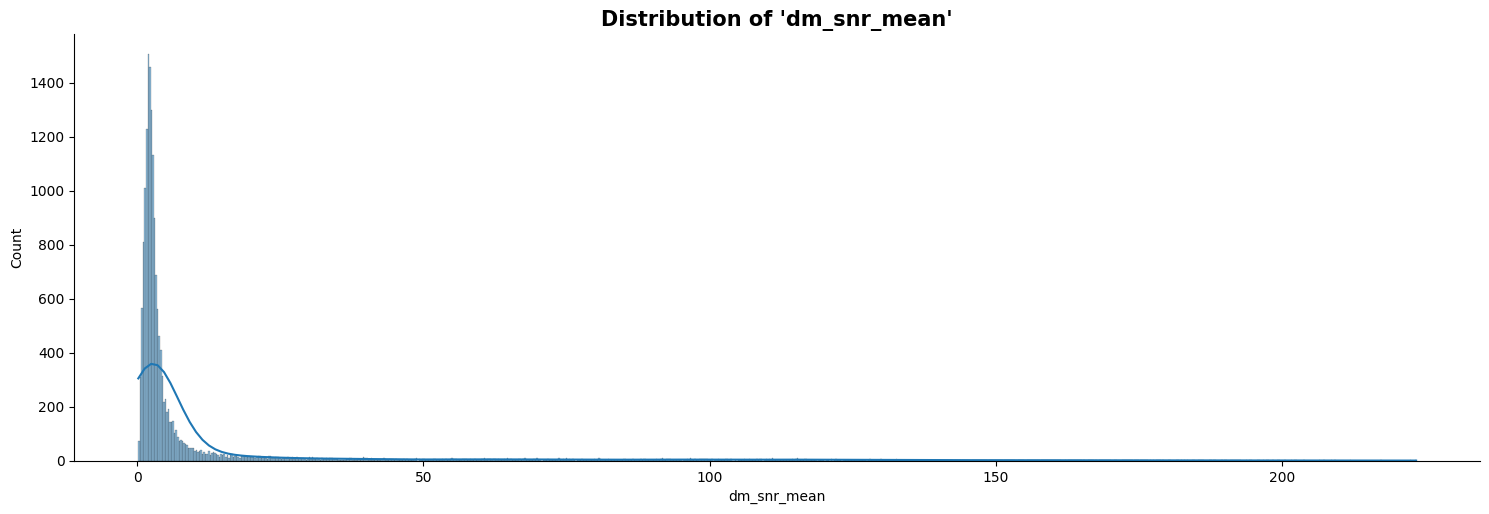

In [131]:
feature_ = "dm_snr_mean"
title = "Distribution of '{}'".format(feature_)
plot_dist(dataset[feature_], title)

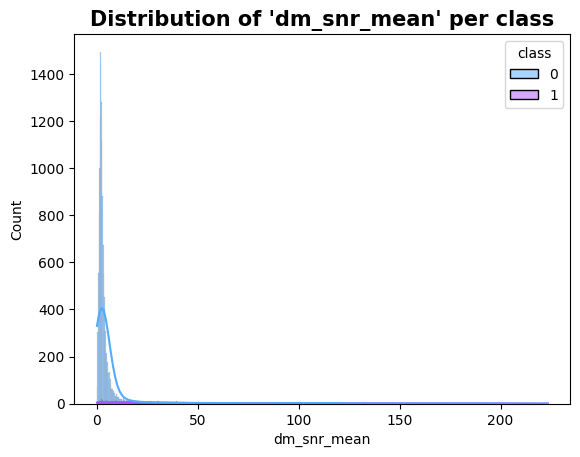

In [132]:
title = "Distribution of '{}' per class".format(feature_)
plot_dist_class(dataset[feature_], title, hue_in=dataset["class"])

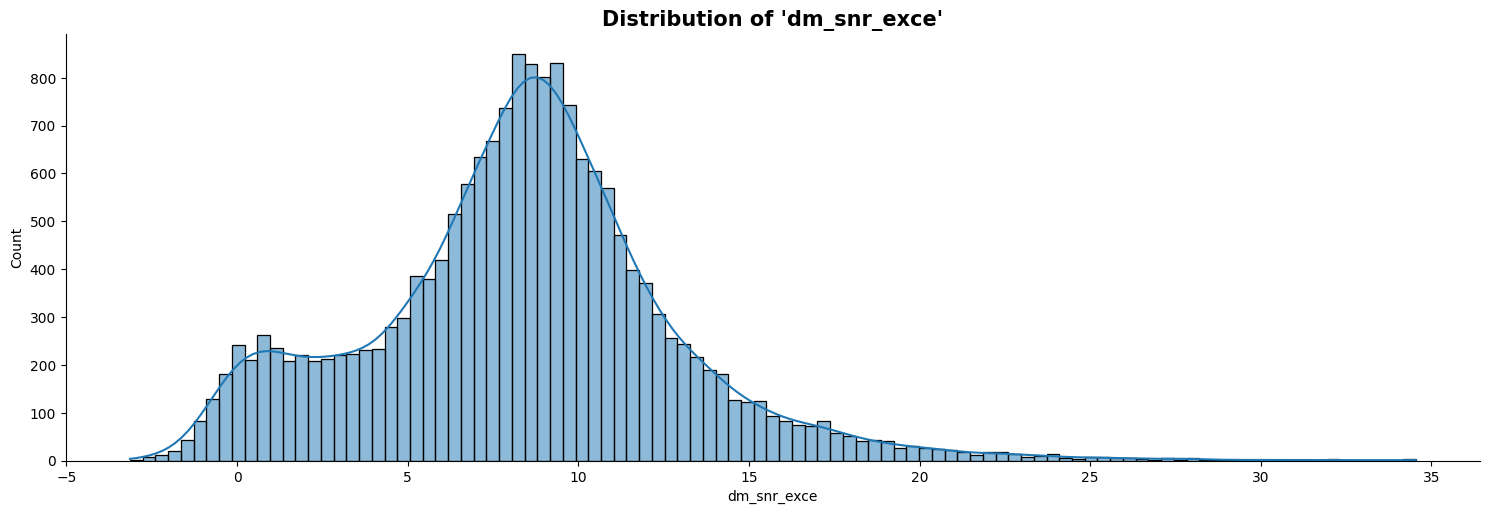

In [133]:
feature_ = "dm_snr_exce"
title = "Distribution of '{}'".format(feature_)
plot_dist(dataset[feature_], title)

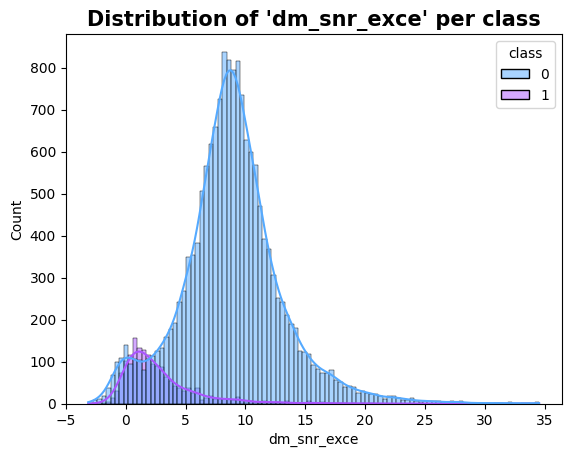

In [134]:
title = "Distribution of '{}' per class".format(feature_)
plot_dist_class(dataset[feature_], title, hue_in=dataset["class"])

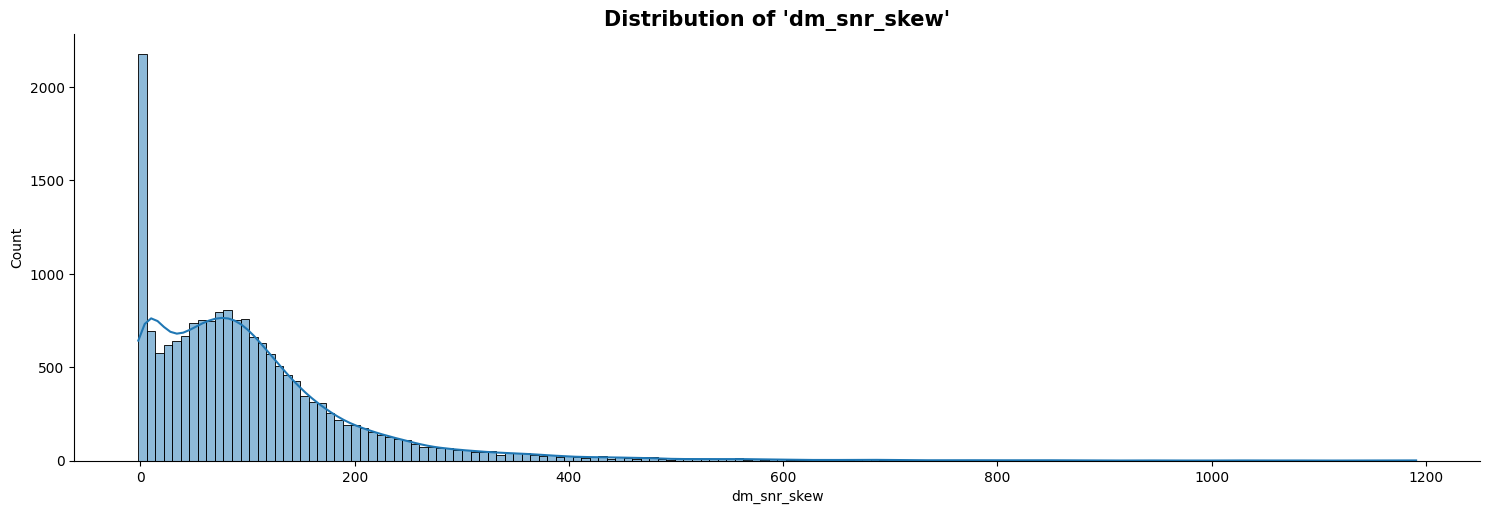

In [135]:
feature_ = "dm_snr_skew"
title = "Distribution of '{}'".format(feature_)
plot_dist(dataset[feature_], title)

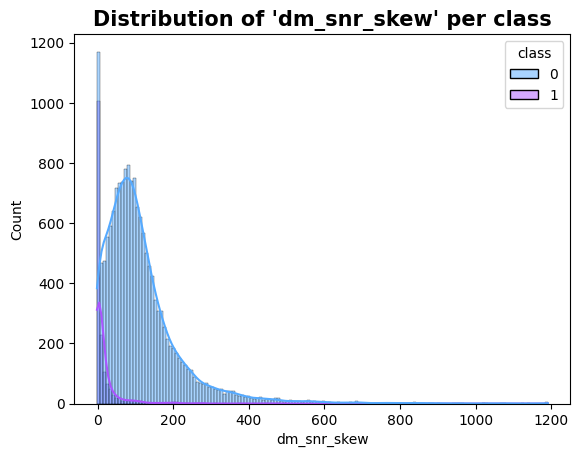

In [136]:
title = "Distribution of '{}' per class".format(feature_)
plot_dist_class(dataset[feature_], title, hue_in=dataset["class"])

### Class

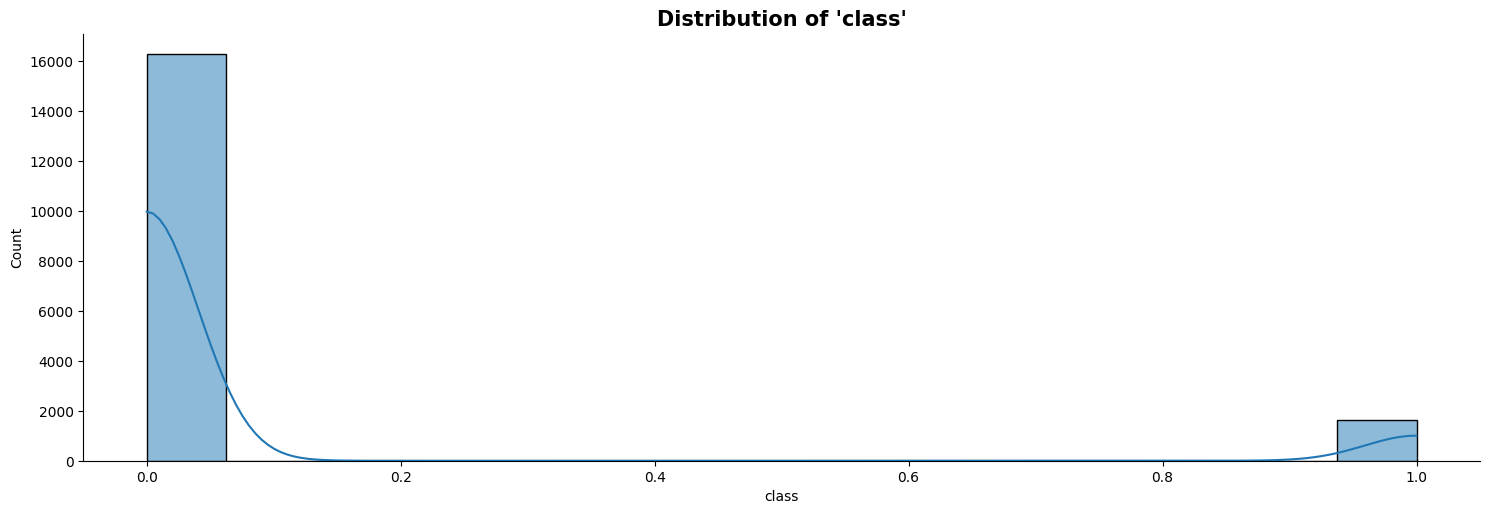

In [79]:
feature_ = "class"
title = "Distribution of '{}'".format(feature_)
plot_dist(dataset[feature_], title)

### Pair Plot

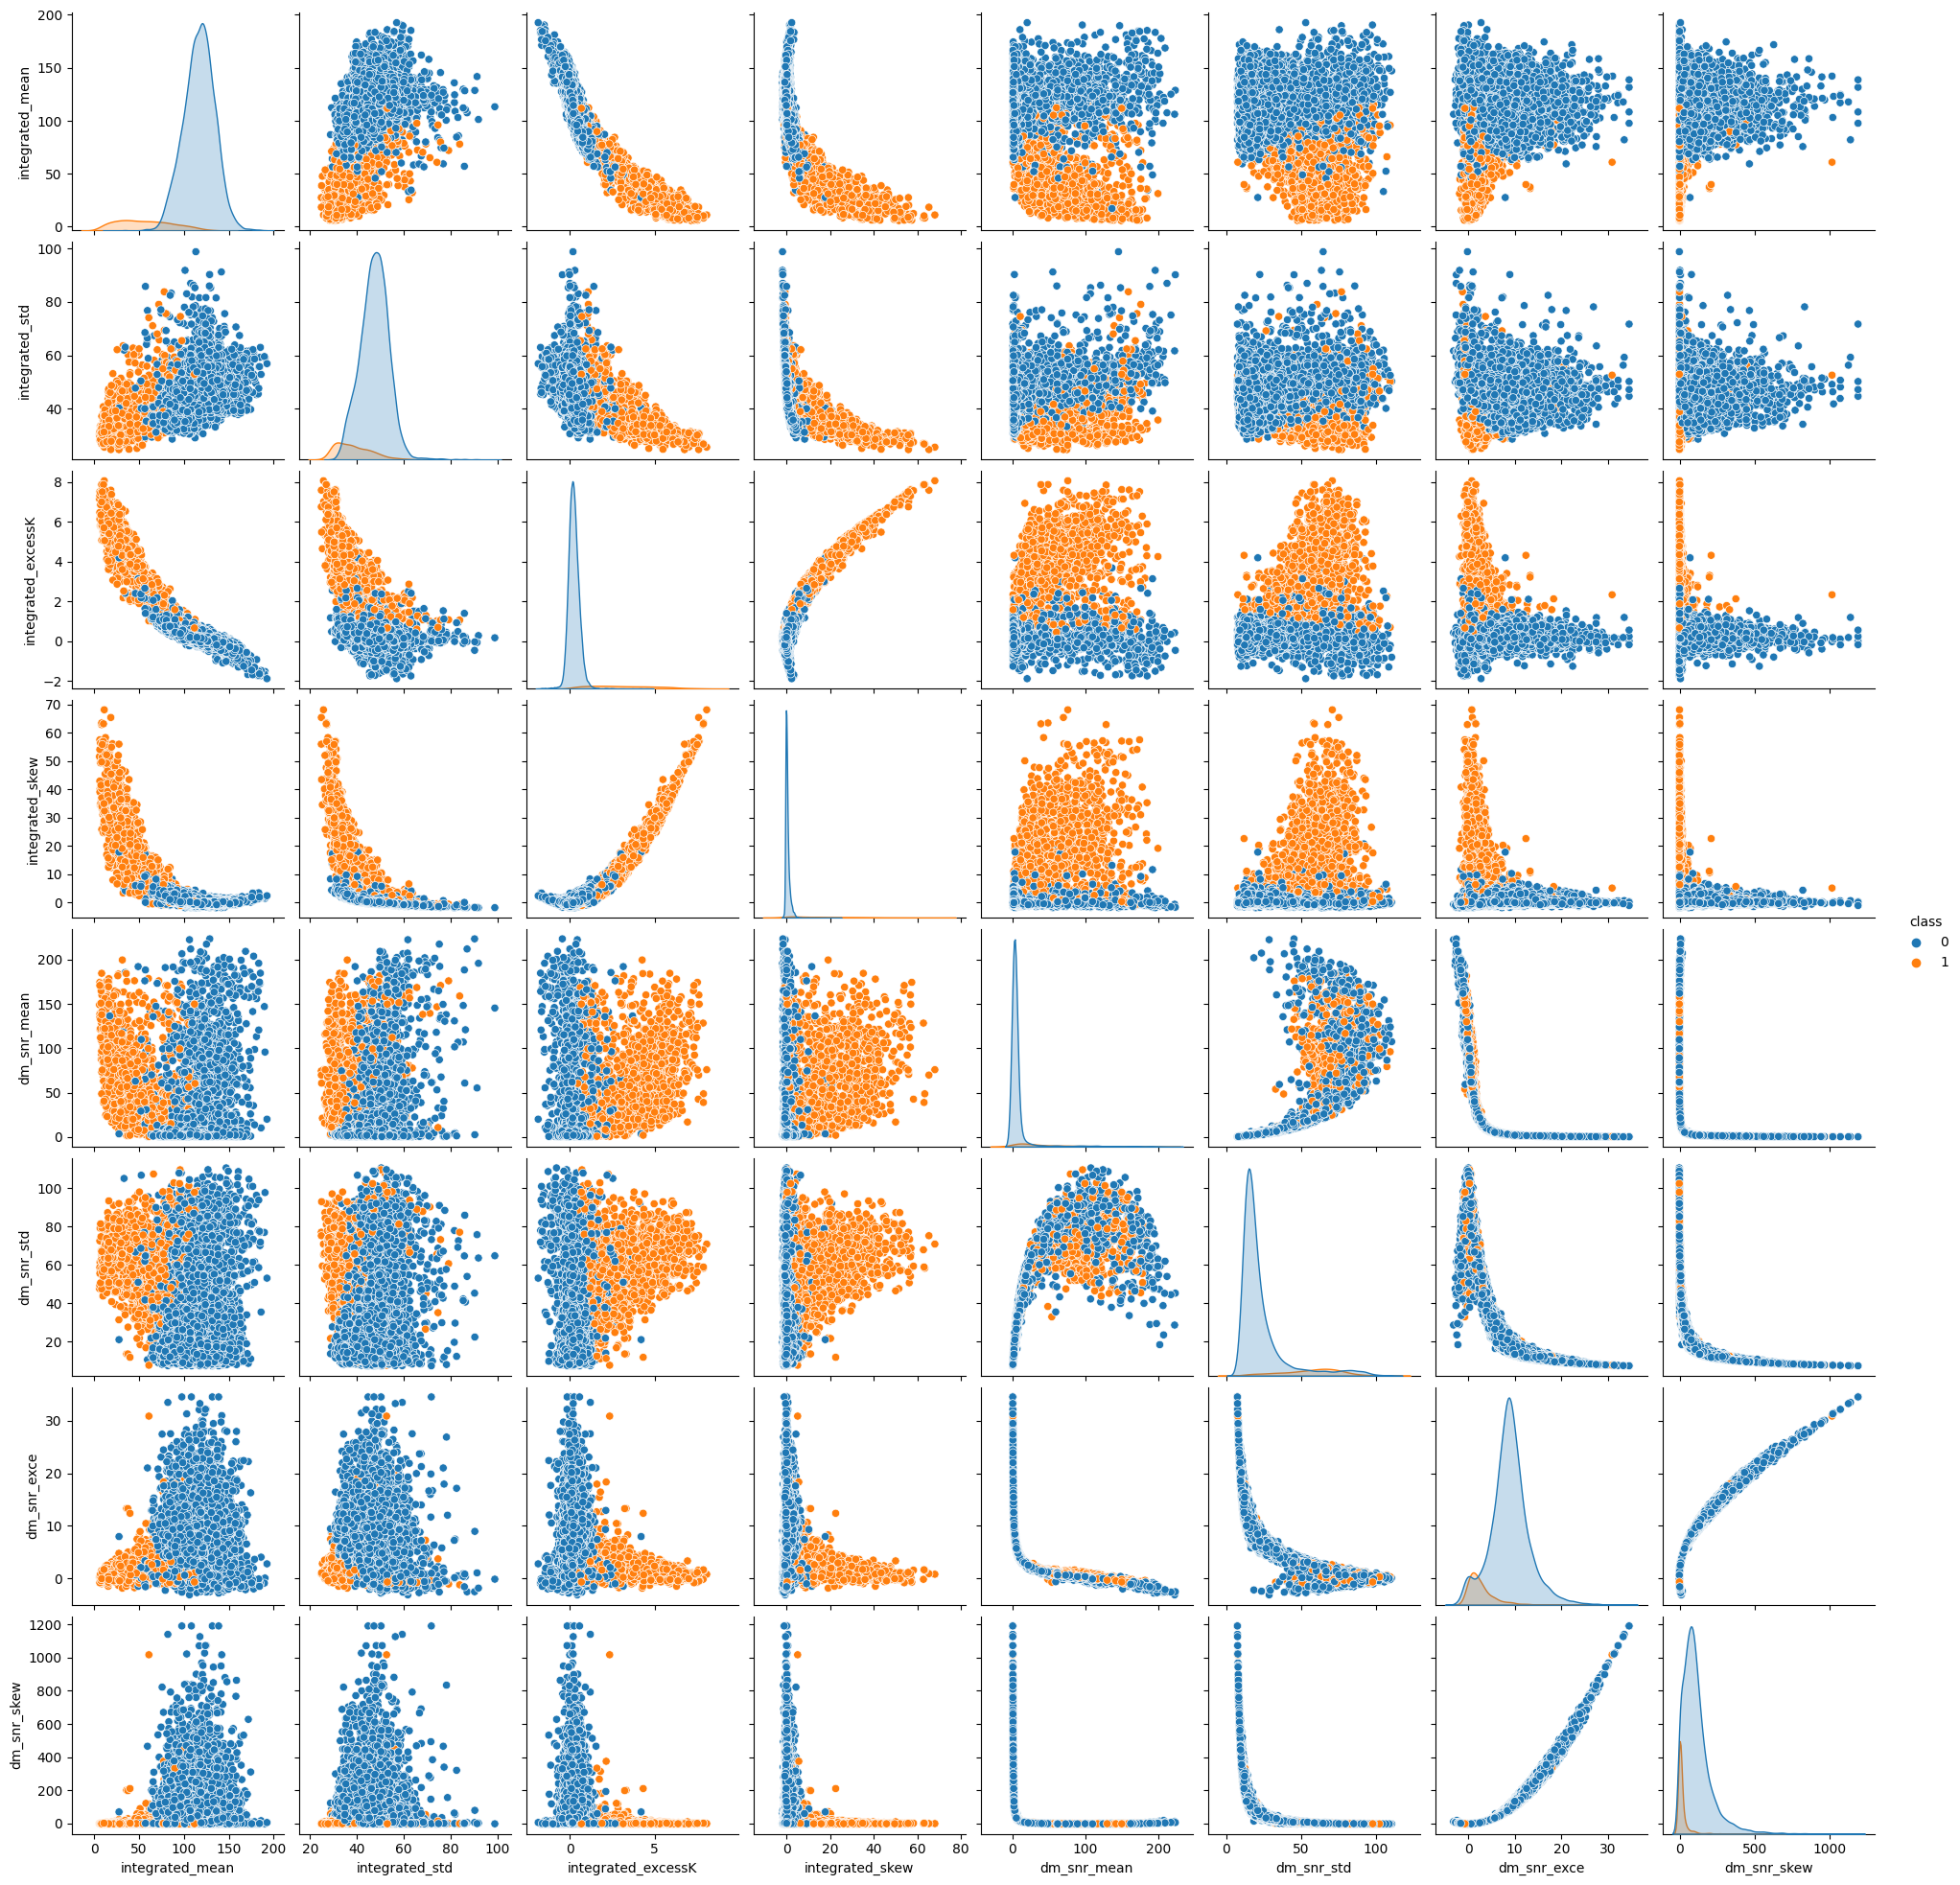

In [80]:
sns.pairplot(dataset, hue="class")
plt.show()

# Spliting the dataset

## Split in different features number set

In [81]:
split_range = [(0, 3), (4, 7), (0, -1)]
split_name = ["first4", "last4", "all"]
split_df = []

In [82]:
count = 0

for i in split_range:
    split_df.append({
        "feature_set": split_name[count],
        "x": dataset.iloc[:, i[0]:i[1]].values,
        "y": dataset.iloc[:, -1].values,
    })
    count+=1

## Elbow Method to find the optimal number of K-means clusters

In [83]:
from sklearn.cluster import KMeans

In [84]:
def elbow(x):
    '''
    PURPOSE:
        Compute WCSS from 1 to 10 in order to find the optimal number of clusters
    
    INPUT:
    x: matrix
        matrix of input features
    
    OUTPUT:
    wcss: list
        a list of wcss val from 1 ~ 10 clusters
    '''
    wcss = list()
    
    for i in range(1, 11):
        # intial with K-Means++ to avoid initalization trap
        kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
        
        # train the matrix features
        kmeans.fit(x)
        
        # get the WCSS val
        wcss.append(kmeans.inertia_)
    
    return wcss

In [85]:
wcss_list = list()

In [86]:
for item in split_df:
    print(item['x'])
    break

[[140.5625      55.68378214  -0.23457141]
 [102.5078125   58.88243001   0.46531815]
 [103.015625    39.34164944   0.32332837]
 ...
 [119.3359375   59.93593941   0.1593631 ]
 [114.5078125   53.90239966   0.20116138]
 [ 57.0625      85.79734025   1.40639105]]


In [87]:
for item in split_df:
    r = elbow(item['x'])
    wcss_list.append(r)

### Plot the Elbow Method results

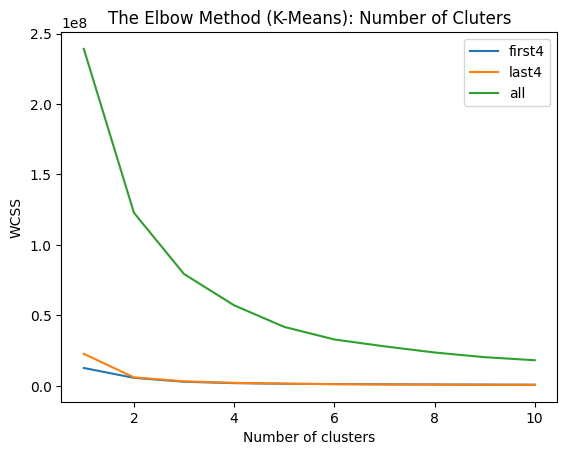

In [88]:
count = 0
for elbow in wcss_list:    
    plt.plot(range(1, 11), elbow, label=split_name[count])
    plt.title("The Elbow Method (K-Means): Number of Cluters")
    plt.xlabel("Number of clusters")
    plt.ylabel("WCSS")
    count+=1

plt.legend()
plt.show()

As we can see from the elbow method, the optimal value of K is when:
1. 2 when we have the first and the last four features
2. 5 when we have all the features

In [137]:
kmean_k_list = [2, 2, 6]
# first 4, last 4, all

## Dendrogram to find the optimal number of Hierarchical clusters

In [151]:
import scipy.cluster.hierarchy as sch

In [153]:
def dendrog_graph(x):
    plt.figure(figsize=(15,10))
    dendrogram = sch.dendrogram(sch.linkage(x, method="ward"))

    '''
    ##################### Argument Explanation #####################
    sch.dendrogram(): instance of the dendrogram and then return the plot of the dendrogram
    sch.linkage(): Calculate the distance between each sample
        x: input features
        method: provide the name of the method that mini variance in the cluster, in this case we are using "ward"
    '''

    plt.title("Dendrograms")

    # x label is the customer because we are trying to cluster the customers
#     plt.xlabel("Customer")

    # since the y-axis is the distance between each clusters, so we just label it as distance
#     plt.ylabel("Distance")

    plt.show()

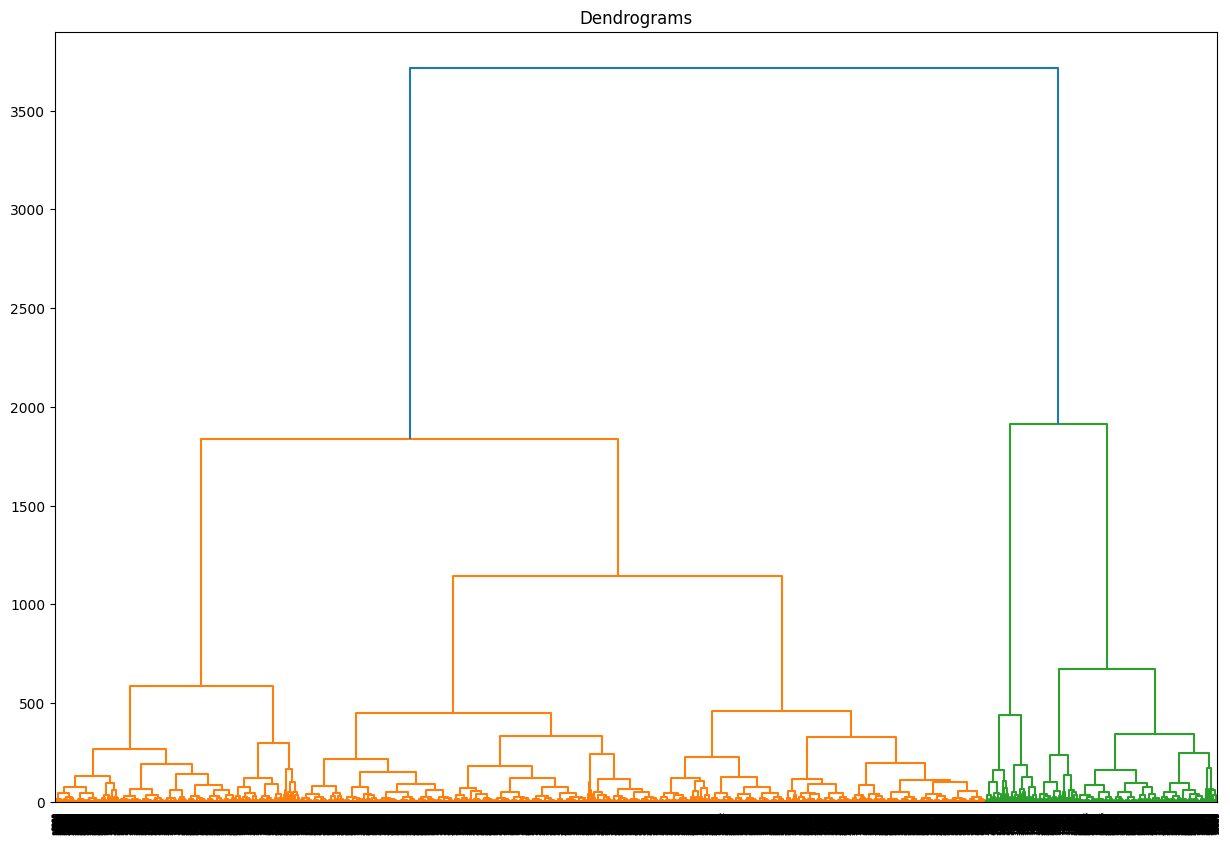

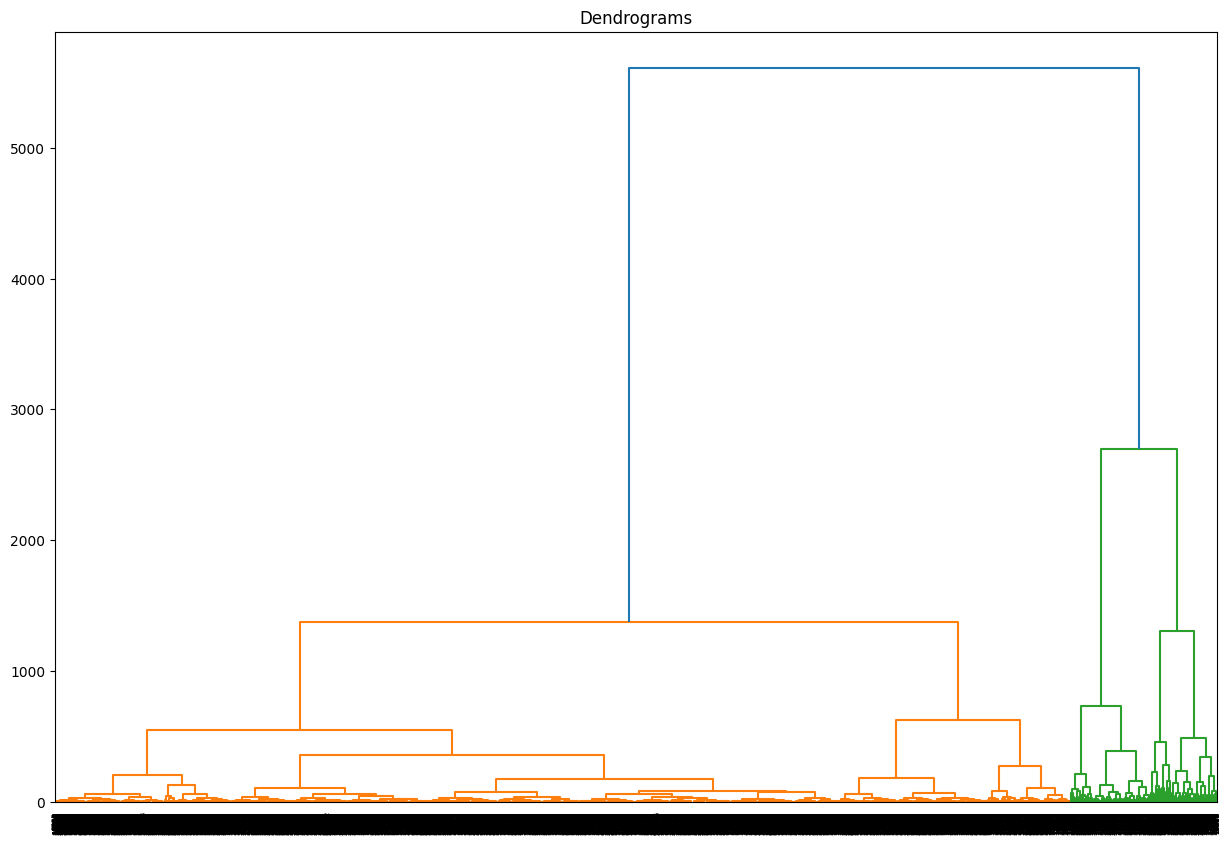

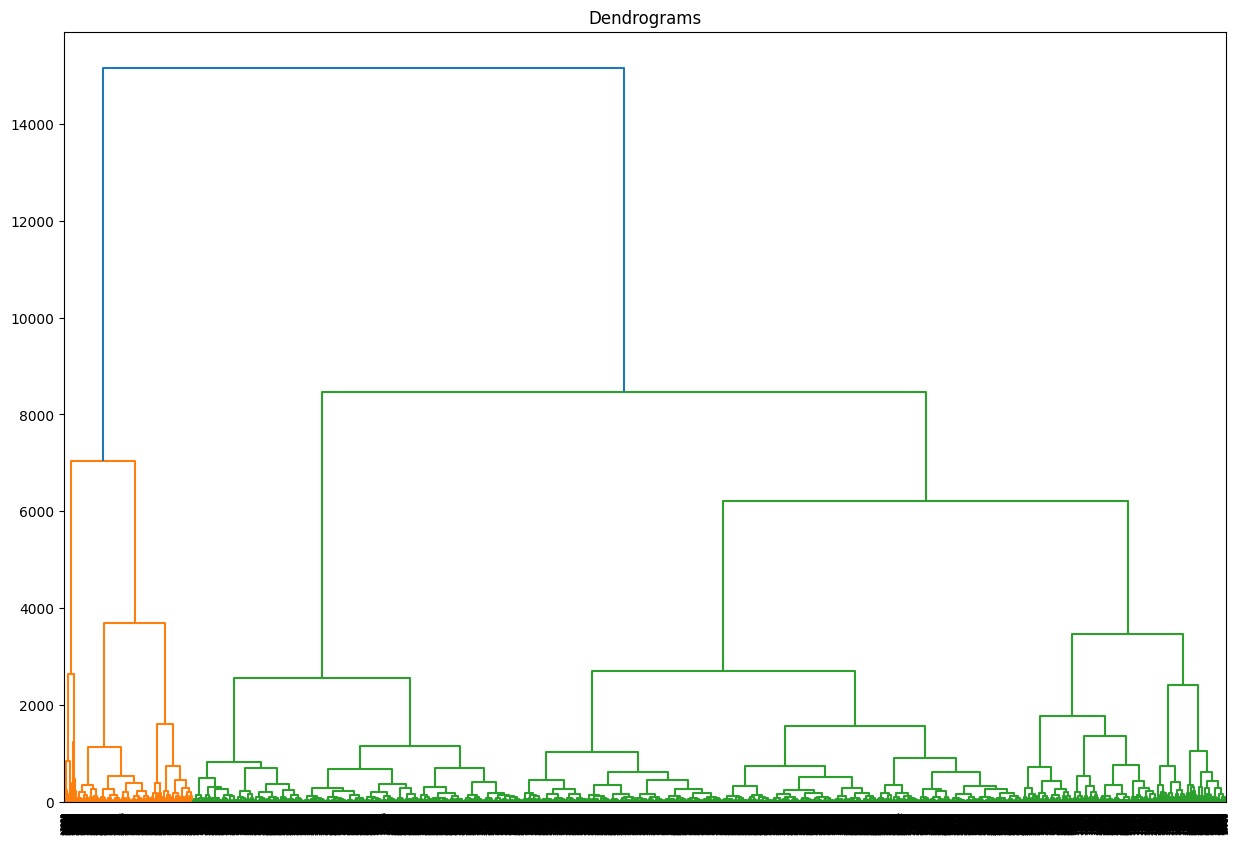

In [154]:
for item in split_df:
    dendrog_graph(item["x"])

As we can see from the dendrogram, the optimal number of cluster for:
1. First 4 featrues is 4
2. Last 4 features is 3
3. All features is 4

In [231]:
dendrog_val = [4, 3, 3]

# Model

## K-Means

In [138]:
kmeans_list = []

In [139]:
for i in kmean_k_list:
    kmeans_list.append(KMeans(n_clusters=i, init="k-means++", random_state=42))

In [140]:
y_kmeans_list = []

for i in range(len(split_df)):
    y_kmeans_list.append(kmeans_list[i].fit_predict(split_df[i]['x']))

In [141]:
# for item in y_kmeans:
#     print(item, end=", ")

In [142]:
# x[0]

## Hierarchical Clustering

In [194]:
from sklearn.cluster import AgglomerativeClustering

In [232]:
dendrog_list = []
hierarchical_y_pred = []

In [233]:
for i in dendrog_val:
    dendrog_list.append(AgglomerativeClustering(n_clusters=i, affinity="euclidean", linkage="ward"))

In [234]:
for i in range(len(dendrog_list)):
    hierarchical_y_pred.append(dendrog_list[i].fit_predict(split_df[i]["x"]))

# Analysis

## K-Means

### Clustering plot

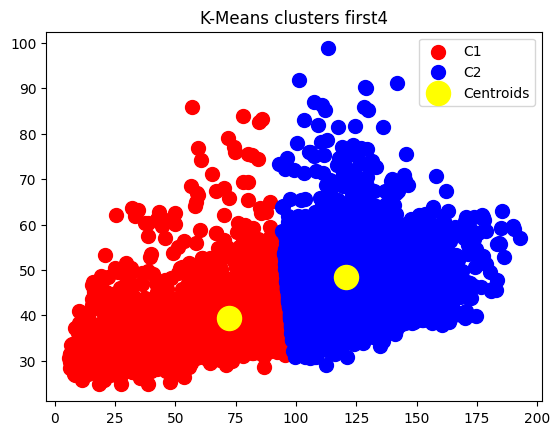

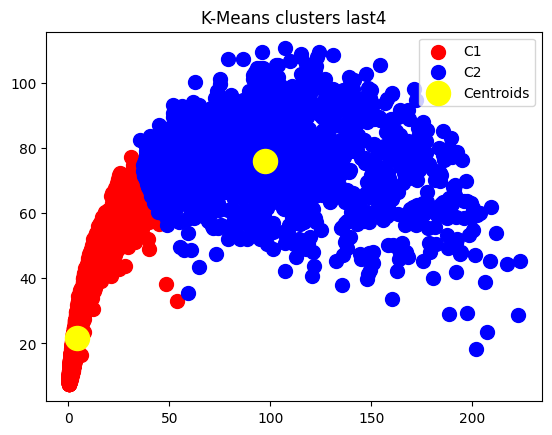

In [143]:
for i in range(2):
    # cluster "0" class
    filt1 = (y_kmeans_list[i] == 0)
    plt.scatter(split_df[i]['x'][filt1, 0], split_df[i]['x'][filt1, 1], s=100, c='red', label="C1")

    # cluster "1" class
    filt1 = (y_kmeans_list[i] == 1)
    plt.scatter(split_df[i]['x'][filt1, 0], split_df[i]['x'][filt1, 1], s=100, c='blue', label="C2")

    # plot the centroid of each cluster
    centroid_x = kmeans_list[i].cluster_centers_[:, 0]
    centroid_y = kmeans_list[i].cluster_centers_[:, 1]
    plt.scatter(centroid_x, centroid_y, s=300, c="yellow", label="Centroids")

    plt.title("K-Means clusters " + split_df[i]['feature_set'])
    plt.legend()
    plt.show()

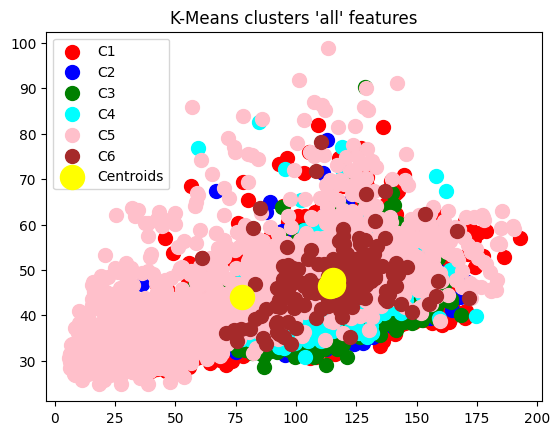

In [147]:
# cluster "0" class
filt1 = (y_kmeans_list[2] == 0)
plt.scatter(split_df[2]['x'][filt1, 0], split_df[2]['x'][filt1, 1], s=100, c='red', label="C1")

# cluster "1" class
filt1 = (y_kmeans_list[2] == 1)
plt.scatter(split_df[2]['x'][filt1, 0], split_df[2]['x'][filt1, 1], s=100, c='blue', label="C2")

# cluster "2" class
filt1 = (y_kmeans_list[2] == 2)
plt.scatter(split_df[2]['x'][filt1, 0], split_df[2]['x'][filt1, 1], s=100, c='green', label="C3")

# cluster "3" class
filt1 = (y_kmeans_list[2] == 3)
plt.scatter(split_df[2]['x'][filt1, 0], split_df[2]['x'][filt1, 1], s=100, c='cyan', label="C4")

# cluster "4" class
filt1 = (y_kmeans_list[2] == 4)
plt.scatter(split_df[2]['x'][filt1, 0], split_df[2]['x'][filt1, 1], s=100, c='pink', label="C5")

# cluster "5" class
filt1 = (y_kmeans_list[2] == 5)
plt.scatter(split_df[2]['x'][filt1, 0], split_df[2]['x'][filt1, 1], s=100, c='brown', label="C6")

# plot the centroid of each cluster
centroid_x = kmeans_list[2].cluster_centers_[:, 0]
centroid_y = kmeans_list[2].cluster_centers_[:, 1]
plt.scatter(centroid_x, centroid_y, s=300, c="yellow", label="Centroids")

plt.title("K-Means clusters '" + split_df[2]['feature_set'] + "' features")
plt.legend()
plt.show()

### Contingency Matrix

In [97]:
from sklearn.metrics.cluster import contingency_matrix

In [148]:
contingencyM = []

In [236]:
# def test_contingency_matrix():
#     labels_a = np.array([1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3])
#     labels_b = np.array([1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 3, 1, 3, 3, 3, 2, 2])
#     C = contingency_matrix(labels_a, labels_b)
# #     C2 = np.histogram2d(labels_a, labels_b,
# #                         bins=(np.arange(1, 5),
# #                               np.arange(1, 5)))[0]
# #     assert_array_almost_equal(C, C2)
# #     C = contingency_matrix(labels_a, labels_b, eps=.1)
#     print(C)
# #     assert_array_almost_equal(C, C2 + .1)
    
# test_contingency_matrix()

In [149]:
for i in range(3):
    contingencyM.append(contingency_matrix(split_df[i]["y"], y_kmeans_list[i]))
    print(contingency_matrix(split_df[i]["y"], y_kmeans_list[i]), end="\n\n")

[[ 2147 14112]
 [ 1440   199]]

[[15419   840]
 [  907   732]]

[[5514 2622 6319  814  823  167]
 [ 520   29   64    8 1017    1]]



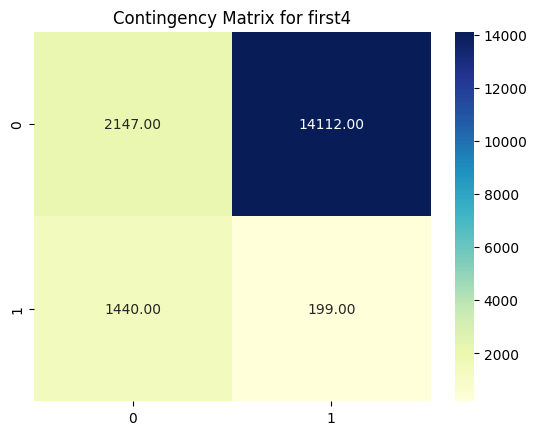

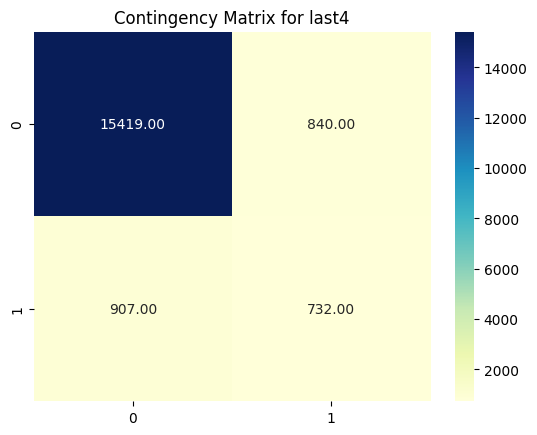

In [160]:
for i in range(2):
    sns.heatmap(contingencyM[i], annot=True, fmt='.2f', cmap="YlGnBu")
    # sns.heatmap(contingencyM[i], xticklabels=head[:-1], annot=True, fmt='.2f', cmap="YlGnBu", vmin=0.0, vmax=100.0)
    plt.title("Contingency Matrix for " + split_name[i])
    plt.show()

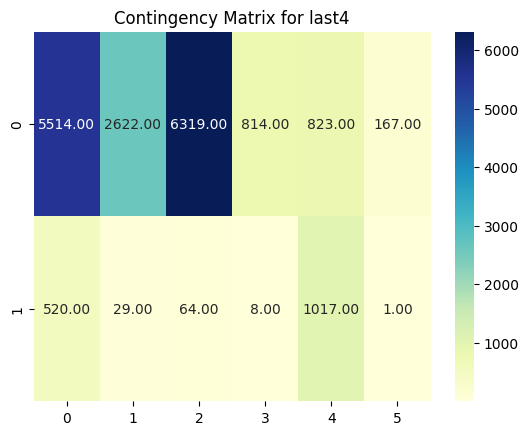

In [161]:
sns.heatmap(contingencyM[2], annot=True, fmt='.2f', cmap="YlGnBu")
plt.title("Contingency Matrix for " + split_name[i])
plt.show()

In [166]:
split_df[2]["x"][0]

array([140.5625    ,  55.68378214,  -0.23457141,  -0.6996484 ,
         3.19983278,  19.11042633,   7.97553179,  74.24222492])

In [172]:
for i in y_kmeans_list[2]:
    print(i, end=" ")

2 2 0 0 1 2 3 1 2 0 0 1 0 2 0 2 1 0 0 0 0 0 1 0 2 0 2 2 2 1 1 3 2 0 2 1 2 0 1 2 2 0 1 2 1 2 2 1 0 2 1 0 2 3 3 0 2 1 2 1 0 4 0 2 1 1 0 0 0 3 2 2 2 0 0 2 0 0 2 0 0 1 0 1 2 2 0 2 2 2 2 0 4 0 4 3 0 0 0 2 0 0 2 0 2 1 0 2 0 2 4 0 0 0 0 1 2 0 0 2 2 2 1 0 2 2 1 1 2 2 0 2 4 2 4 0 2 0 2 1 2 2 0 2 2 4 4 0 0 1 2 2 1 2 1 0 3 2 1 0 1 0 0 2 2 2 2 2 2 2 2 0 0 0 0 1 2 0 4 2 2 1 0 2 3 2 1 2 0 0 0 2 2 0 0 0 1 0 1 1 3 0 2 0 0 3 2 1 2 0 2 2 1 2 5 3 1 0 2 0 0 2 0 0 0 0 2 4 1 0 2 0 0 0 2 1 0 0 0 0 0 1 2 2 1 0 0 0 0 2 2 2 1 0 2 0 1 2 1 0 0 2 0 2 0 0 1 1 2 2 0 2 0 0 2 2 1 2 2 2 2 0 1 4 1 0 1 0 1 0 0 2 2 0 2 0 0 0 1 2 2 0 0 2 0 2 2 0 2 2 1 0 2 2 0 2 1 1 0 1 2 0 0 1 0 1 1 2 0 0 2 1 2 2 0 2 0 0 2 0 0 0 0 2 0 2 2 1 0 0 1 2 2 0 2 2 2 0 0 4 0 3 2 2 4 2 1 4 1 4 4 2 1 3 0 1 0 4 2 2 0 0 2 2 1 1 1 2 2 2 0 2 0 2 2 0 1 4 2 3 0 4 0 4 4 0 1 0 2 2 2 1 0 1 2 0 0 2 2 4 2 2 0 0 2 2 0 0 0 2 0 0 0 0 0 2 2 2 2 2 4 2 0 0 0 1 2 4 0 0 0 0 0 1 4 4 0 0 0 0 3 0 0 1 2 1 3 0 0 2 0 2 5 4 0 2 0 0 3 0 0 4 0 2 2 4 0 2 2 1 1 0 2 0 3 2 4 1 1 2 

 0 1 0 0 0 1 2 4 0 2 4 3 4 2 0 2 0 2 0 4 0 0 0 0 0 2 0 1 2 0 0 4 2 1 1 2 2 1 1 0 0 2 1 0 2 1 4 0 2 2 0 0 2 0 4 0 2 4 1 0 1 0 4 2 4 0 2 2 0 1 0 1 1 1 2 0 2 2 2 2 0 1 2 0 1 4 0 2 2 1 0 0 0 0 2 0 1 2 4 2 0 2 1 1 1 2 4 2 0 0 3 2 2 0 0 0 2 2 4 2 2 4 2 3 0 0 2 2 2 4 4 3 0 2 1 4 1 1 4 4 4 4 0 4 4 1 4 2 2 1 2 4 0 2 1 2 0 0 1 0 2 4 4 1 0 0 0 2 2 2 1 0 4 4 2 2 1 2 2 2 2 0 2 2 0 0 2 2 1 2 0 2 4 3 2 2 4 0 2 0 0 2 0 0 0 0 2 4 2 3 2 0 3 2 0 0 0 4 4 0 0 4 0 4 4 2 0 2 0 0 2 4 2 4 0 0 2 1 2 0 2 3 0 1 4 2 1 1 1 2 0 4 4 2 1 2 2 0 2 1 1 0 2 2 0 2 0 0 1 2 0 2 0 2 0 4 1 0 4 2 0 0 0 2 1 4 0 0 2 2 0 3 4 0 4 4 4 0 4 1 0 2 0 0 0 2 2 0 4 5 2 0 0 2 4 4 0 2 1 0 0 0 1 3 0 0 2 2 0 0 2 2 2 3 2 2 2 2 2 2 0 2 2 2 0 0 0 0 2 2 2 0 2 2 0 1 2 0 0 0 0 0 2 2 4 0 0 1 1 0 0 2 3 2 1 1 2 2 0 0 4 2 2 2 0 0 0 0 2 0 0 4 2 0 1 2 0 2 4 2 4 0 2 0 2 0 0 2 2 0 2 0 2 4 0 0 1 2 4 2 3 2 3 0 2 0 0 1 2 2 2 0 0 0 2 2 3 2 0 0 0 2 2 1 2 2 0 2 0 2 2 3 0 0 0 2 4 2 3 0 1 2 2 1 0 1 2 2 2 1 0 4 0 2 2 0 2 1 2 1 0 1 0 3 0 0 2 2 4 1 4 2 2 2 2 1 0 2 2 0

0 1 0 2 2 0 2 2 3 2 2 0 2 1 1 3 2 2 2 2 4 2 0 1 0 1 2 1 2 3 2 1 2 4 1 2 2 0 2 1 2 2 2 2 2 2 2 2 3 0 1 0 2 0 0 0 0 2 0 0 2 0 2 2 2 1 2 2 0 1 1 1 1 4 1 1 2 0 0 2 4 1 0 2 0 1 2 1 5 0 1 2 0 0 2 0 0 2 1 2 0 2 3 1 0 2 2 0 2 2 0 0 1 2 0 1 2 0 2 4 0 2 2 2 0 2 0 2 0 2 0 0 1 1 0 2 2 2 2 2 5 3 2 0 0 4 2 2 0 0 0 3 2 0 0 2 1 2 0 0 0 0 2 0 3 2 0 0 0 0 2 0 1 0 2 4 0 0 2 1 4 1 0 2 1 0 0 0 1 0 1 2 2 0 5 0 0 0 1 0 2 1 2 0 2 0 2 0 2 0 2 0 2 1 0 2 3 0 0 2 1 0 0 2 0 1 0 2 0 0 3 0 2 0 1 2 2 2 2 1 1 2 0 1 1 2 0 0 0 1 0 2 0 0 2 4 0 4 4 4 1 4 0 0 5 0 4 4 4 0 0 4 5 2 1 2 0 2 0 0 0 2 0 2 2 2 2 1 0 2 2 2 2 2 1 2 0 4 2 2 2 0 0 2 0 3 1 0 2 2 0 2 2 1 2 0 2 4 1 0 1 0 2 2 2 4 0 2 2 2 1 1 1 3 4 1 1 2 4 0 0 3 0 0 2 1 0 1 0 1 2 1 2 2 0 0 1 2 0 0 2 4 2 3 2 4 2 0 1 0 2 0 2 2 2 0 0 2 2 2 3 0 1 2 2 2 2 2 2 2 2 2 2 2 0 2 2 1 2 0 0 2 1 2 0 1 0 2 2 2 2 0 1 2 3 3 2 3 4 2 2 1 2 5 4 0 2 2 2 1 2 3 1 2 0 1 2 2 2 2 3 2 2 2 0 3 2 2 2 1 2 2 0 0 2 0 2 2 2 0 0 1 0 3 2 2 0 1 3 0 2 1 0 0 1 1 4 0 2 2 0 0 0 0 0 1 2 2 1 2 4 1 0 1 2 0 0 0 1 2 

## Hierarchical

### Clustering Plot

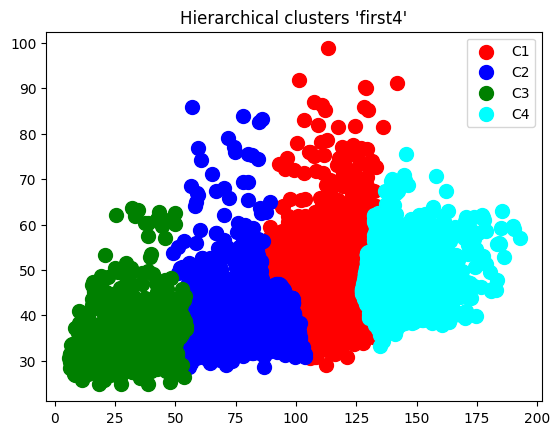

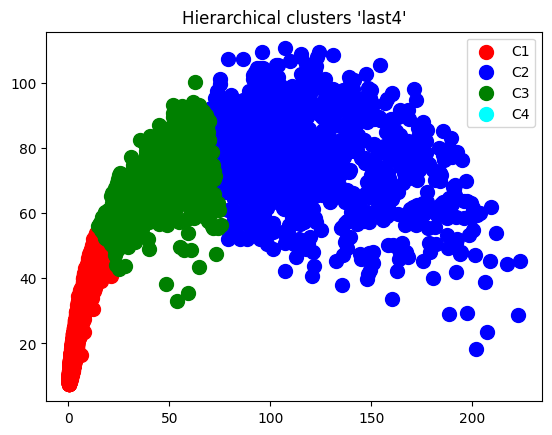

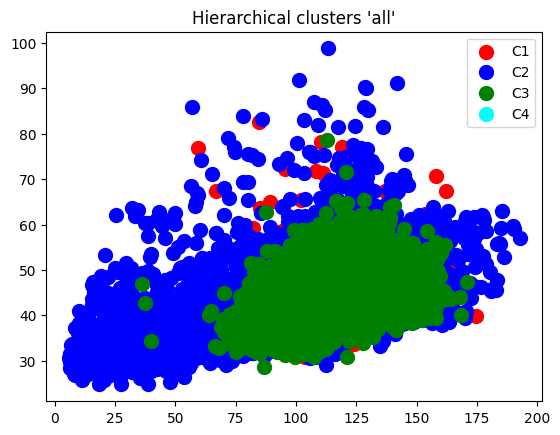

In [235]:
for i in range(len(hierarchical_y_pred)):
    # cluster "0" class
    filt1 = (hierarchical_y_pred[i] == 0)
    plt.scatter(split_df[i]['x'][filt1, 0], split_df[i]['x'][filt1, 1], s=100, c='red', label="C1")

    # cluster "1" class
    filt1 = (hierarchical_y_pred[i] == 1)
    plt.scatter(split_df[i]['x'][filt1, 0], split_df[i]['x'][filt1, 1], s=100, c='blue', label="C2")

    # cluster "2" class
    filt1 = (hierarchical_y_pred[i] == 2)
    plt.scatter(split_df[i]['x'][filt1, 0], split_df[i]['x'][filt1, 1], s=100, c='green', label="C3")

    # cluster "3" class
    filt1 = (hierarchical_y_pred[i] == 3)
    plt.scatter(split_df[i]['x'][filt1, 0], split_df[i]['x'][filt1, 1], s=100, c='cyan', label="C4")

    plt.title("Hierarchical clusters '" + split_df[i]['feature_set'] + "'")
    plt.legend()
    plt.show()

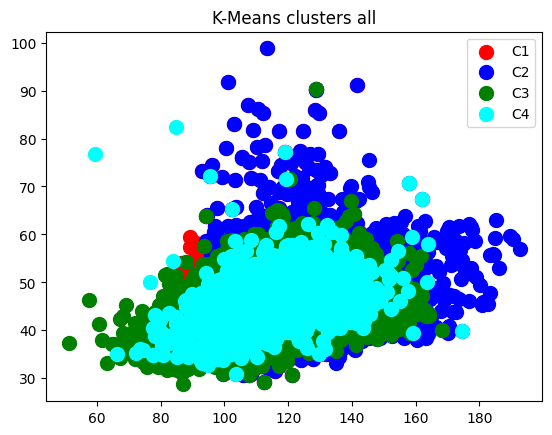

In [214]:
# cluster "0" class
filt1 = (hierarchical_y_pred[0] == 0)
plt.scatter(split_df[i]['x'][filt1, 0], split_df[i]['x'][filt1, 1], s=100, c='red', label="C1")

# cluster "1" class
filt1 = (y_kmeans_list[0] == 1)
plt.scatter(split_df[i]['x'][filt1, 0], split_df[i]['x'][filt1, 1], s=100, c='blue', label="C2")

# cluster "2" class
filt1 = (y_kmeans_list[2] == 2)
plt.scatter(split_df[2]['x'][filt1, 0], split_df[2]['x'][filt1, 1], s=100, c='green', label="C3")

# cluster "3" class
filt1 = (y_kmeans_list[2] == 3)
plt.scatter(split_df[2]['x'][filt1, 0], split_df[2]['x'][filt1, 1], s=100, c='cyan', label="C4")

plt.title("K-Means clusters " + split_df[i]['feature_set'])
plt.legend()
plt.show()

### Contingency Matrix

In [237]:
contingencyH = []

In [238]:
for i in range(len(hierarchical_y_pred)):
    contingencyH.append(contingency_matrix(split_df[i]["y"], hierarchical_y_pred[i]))
    print(contingency_matrix(split_df[i]["y"], hierarchical_y_pred[i]), end="\n\n")

[[10343  2134    10  3772]
 [  218   619   796     6]]

[[15068   583   608]
 [  570   451   618]]

[[1969 9252 5038]
 [  21 1576   42]]



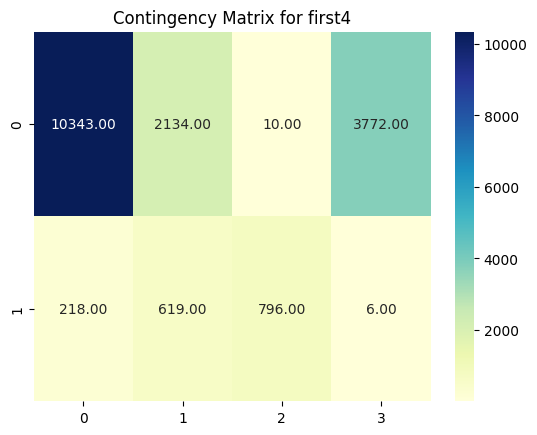

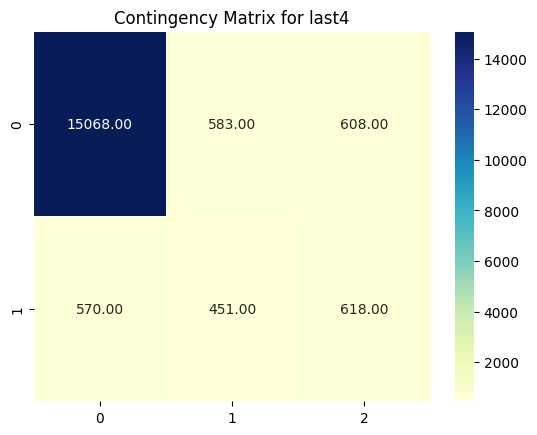

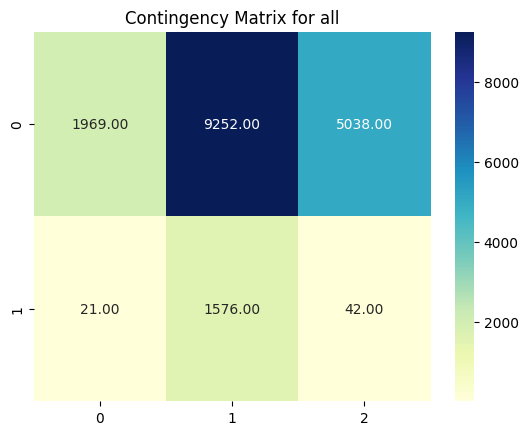

In [241]:
for i in range(len(contingencyH)):
    sns.heatmap(contingencyH[i], annot=True, fmt='.2f', cmap="YlGnBu")
    # sns.heatmap(contingencyM[i], xticklabels=head[:-1], annot=True, fmt='.2f', cmap="YlGnBu", vmin=0.0, vmax=100.0)
    plt.title("Contingency Matrix for " + split_name[i])
    plt.show()